In [1]:
#The data of focus is the global cancer patients from 2015 to 2024.
#I want to predict the cancer type using logistic regression


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
#Import the data
data= pd.read_csv('/content/global_cancer_patients_2015_2024.csv')
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

<Axes: >

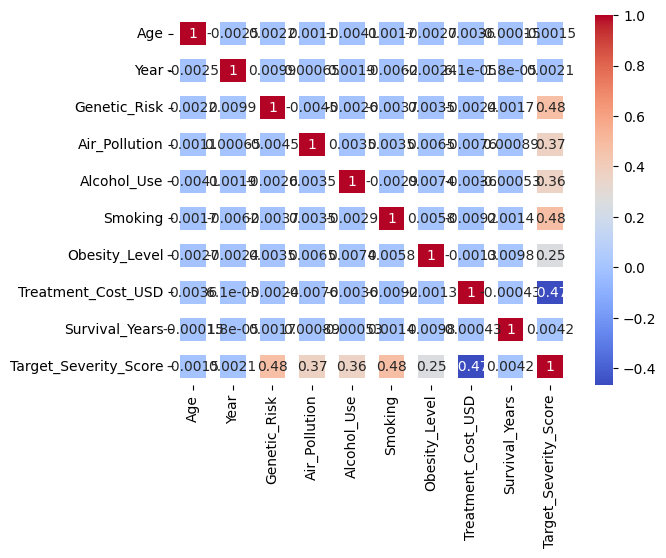

In [19]:
#Lets draw insights by visualization we want to know the features to use
data.info()
data.describe()
data.isnull().sum()
numeric_data = data.select_dtypes(include=np.number)
#Lets draw insights by visualization we want to know the features to use
data.info()
data.describe()
data.isnull().sum()
numeric_data = data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=10)


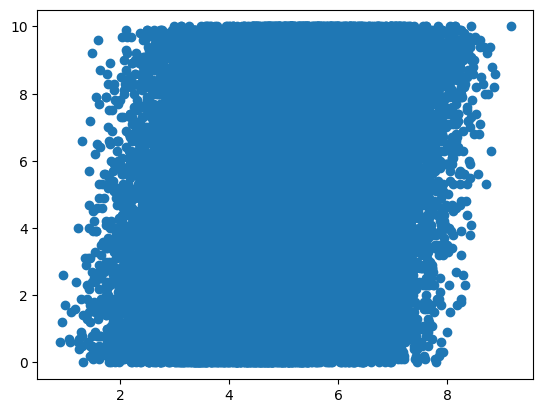

Correlation between Target_Severity_Score and Obesity_Level: 0.25136611327834335
Correlation between Target_Severity_Score and Alcohol_Use: 0.36324990181289274
Correlation between Target_Severity_Score and Smoking: 0.484419831378848


In [20]:
#checking correlation between target severity score and other factors such as smoking etc
# to see if the score was derived based on those features and whether to include in my model
plt.scatter(x='Target_Severity_Score',y='Obesity_Level',data=data)
plt.show()
correlation = data['Target_Severity_Score'].corr(data['Obesity_Level'])
print(f"Correlation between Target_Severity_Score and Obesity_Level: {correlation}")
correlation = data['Target_Severity_Score'].corr(data['Alcohol_Use'])
print(f"Correlation between Target_Severity_Score and Alcohol_Use: {correlation}")
correlation = data['Target_Severity_Score'].corr(data['Smoking'])
print(f"Correlation between Target_Severity_Score and Smoking: {correlation}")
#Based on the correlation so far, adding target severity will make my model leak because
# it has a correlation with those features and my model might be weak based on that
#since it is for a real world event and not for practical, target severity won't a feature for my prediction


In [21]:
#Lets encode the y label
y=data['Cancer_Type']
encode=LabelEncoder()
y=encode.fit_transform(y)
pd.DataFrame(y,columns=['Cancer_Type'])



,Cancer_Type
0,5
1,3
2,0
3,2
4,7
...,...
49995,3
49996,2
49997,0
49998,4


In [22]:
#Lets encode the X features
X=data[['Age','Gender','Country_Region','Obesity_Level','Alcohol_Use','Smoking','Genetic_Risk','Air_Pollution']]
enconder=OneHotEncoder()
X_encodd=enconder.fit_transform(X[['Gender','Country_Region']])
X_encoded=pd.DataFrame(X_encodd.toarray(),columns=enconder.get_feature_names_out())
X_df=X_encoded.drop(['Gender_Female','Country_Region_Australia'],axis=1)
X=pd.concat([X,X_df],axis=1)
X=X.drop(['Gender','Country_Region'],axis=1)
X

,Age,Obesity_Level,Alcohol_Use,Smoking,Genetic_Risk,Air_Pollution,Gender_Male,Gender_Other,Country_Region_Brazil,Country_Region_Canada,Country_Region_China,Country_Region_Germany,Country_Region_India,Country_Region_Pakistan,Country_Region_Russia,Country_Region_UK,Country_Region_USA
0,71,8.7,9.5,0.9,6.4,2.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,34,6.3,3.7,3.9,1.3,4.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80,0.1,2.4,4.7,7.4,7.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,2.7,4.8,3.5,1.7,2.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,43,0.5,2.3,6.7,5.1,2.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,80,2.9,2.8,3.8,2.3,7.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49996,40,9.8,2.9,9.0,6.4,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49997,74,4.0,8.7,4.7,6.2,1.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49998,21,8.1,7.6,8.6,4.0,6.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
model=LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)
model.predict(X_test)
model.score(X_test,y_test)

0.1206